In [1]:
## NN Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Other Dependencies
import pandas as pd
from matplotlib import pyplot as plt

## Initial Data import and pre-processing for Neural Network model

In [2]:
## Import dataset csv

churn_df = pd.read_csv('Resources/clean_churn_db.csv')
attrition_df = pd.read_csv('Resources/BankChurners.csv', usecols=['Attrition_Flag'])

In [3]:
print(f"The amount of Attrited Customers/Existing Customers in the dataset is 1628/8500 or {round(1627/8500 * 100,2)}%")

The amount of Attrited Customers/Existing Customers in the dataset is 1628/8500 or 19.14%


In [4]:
for column in churn_df.columns:
    print(column)

Unnamed: 0
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Gender_F
Gender_M
Education_Level_College
Education_Level_Doctorate
Education_Level_Graduate
Education_Level_High School
Education_Level_Post-Graduate
Education_Level_Uneducated
Education_Level_Unknown
Marital_Status_Divorced
Marital_Status_Married
Marital_Status_Single
Marital_Status_Unknown
Income_Category_$120K +
Income_Category_$40K - $60K
Income_Category_$60K - $80K
Income_Category_$80K - $120K
Income_Category_Less than $40K
Income_Category_Unknown
Card_Category_Blue
Card_Category_Gold
Card_Category_Platinum
Card_Category_Silver


In [5]:
## Define feature values X
X = churn_df.values

## Define target values y
y_df = attrition_df.replace({'Existing Customer':0, 'Attrited Customer':1}).copy()
y = y_df['Attrition_Flag']

In [6]:
## Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [7]:
## Instance Scaler
scaler = StandardScaler()

## Fit Scaler
X_scaler = scaler.fit(X_train)

## Scale Data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
len(X_train_scaled[0])

38

## Initial Modelling Attempt
Using all the availible features in the dataset

In [9]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='initial')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu'))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))

nn.summary()

Model: "initial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                975       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Compile and fit
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
initial_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 2s 3ms/step - loss: 0.3961 - accuracy: 0.8379 - val_loss: 0.2735 - val_accuracy: 0.8985
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9134 - val_loss: 0.2004 - val_accuracy: 0.9325
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9352 - val_loss: 0.1585 - val_accuracy: 0.9443
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9467 - val_loss: 0.1337 - val_accuracy: 0.9502
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9517 - val_loss: 0.1211 - val_accuracy: 0.9514
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9538 - val_loss: 0.1128 - val_accuracy: 0.9558
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9576 - val_loss: 0.1080 - val_accuracy: 0.9585

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0904 - val_accuracy: 0.9648
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0935 - val_accuracy: 0.9637
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9863 - val_loss: 0.0915 - val_accuracy: 0.9641
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9860 - val_loss: 0.0911 - val_accuracy: 0.9625
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0921 - val_accuracy: 0.9648
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0909 - val_accuracy: 0.9664
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0906 - val_accuracy:

In [11]:
initial_loss, initial_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0999 - accuracy: 0.9668 - 97ms/epoch - 1ms/step


In [12]:
## Is this accuracy true?

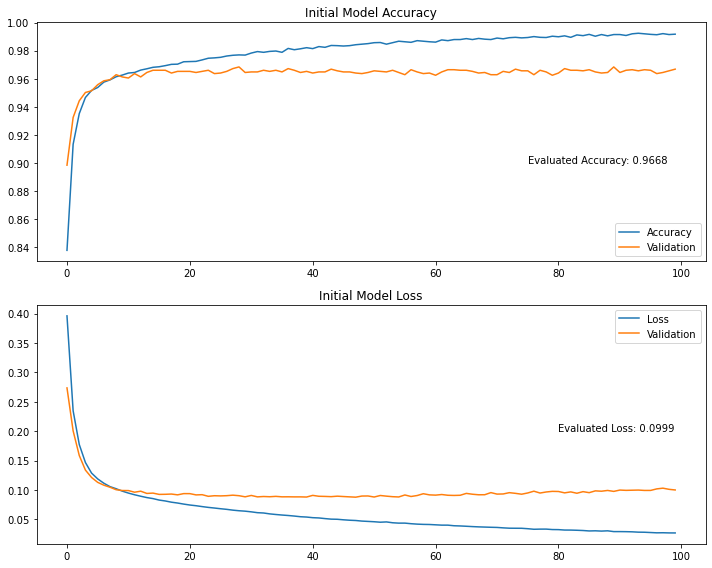

In [43]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(initial_model.history['accuracy'],label='Accuracy')
axs[0].plot(initial_model.history['val_accuracy'],label='Validation')
axs[0].legend(loc='lower right')
axs[0].text(75,.9,f'Evaluated Accuracy: {round(initial_accuracy,4)}')
axs[0].set_title("Initial Model Accuracy")

axs[1].plot(initial_model.history['loss'],label='Loss')
axs[1].plot(initial_model.history['val_loss'],label='Validation')
axs[1].legend(loc='upper right')
axs[1].text(80,.2,f'Evaluated Loss: {round(initial_loss,4)}')
axs[1].set_title("Initial Model Loss")

fig.tight_layout()

Model seems to be overfitted, adjustments to follow.

## Adjusting Model using L2 regularization

In [14]:
from tensorflow.keras import regularizers

In [15]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='l2_reg')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu',
                            kernel_regularizer=regularizers.l2(0.001)))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))

nn.summary()

Model: "l2_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                975       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [16]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
l2_reg_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.4860 - accuracy: 0.7950 - val_loss: 0.3053 - val_accuracy: 0.9127
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.9136 - val_loss: 0.2360 - val_accuracy: 0.9333
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9313 - val_loss: 0.1965 - val_accuracy: 0.9435
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9443 - val_loss: 0.1718 - val_accuracy: 0.9491
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9502 - val_loss: 0.1581 - val_accuracy: 0.9491
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9535 - val_loss: 0.1490 - val_accuracy: 0.9518
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9556 - val_loss: 0.1424 - val_accuracy: 0.9554

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9816 - val_loss: 0.0992 - val_accuracy: 0.9692
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9812 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9821 - val_loss: 0.1038 - val_accuracy: 0.9680
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9817 - val_loss: 0.0985 - val_accuracy: 0.9704
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9812 - val_loss: 0.0986 - val_accuracy: 0.9696
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9828 - val_loss: 0.1009 - val_accuracy: 0.9716
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9829 - val_loss: 0.0976 - val_accuracy:

In [17]:
l2_loss, l2_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.1014 - accuracy: 0.9676 - 101ms/epoch - 1ms/step


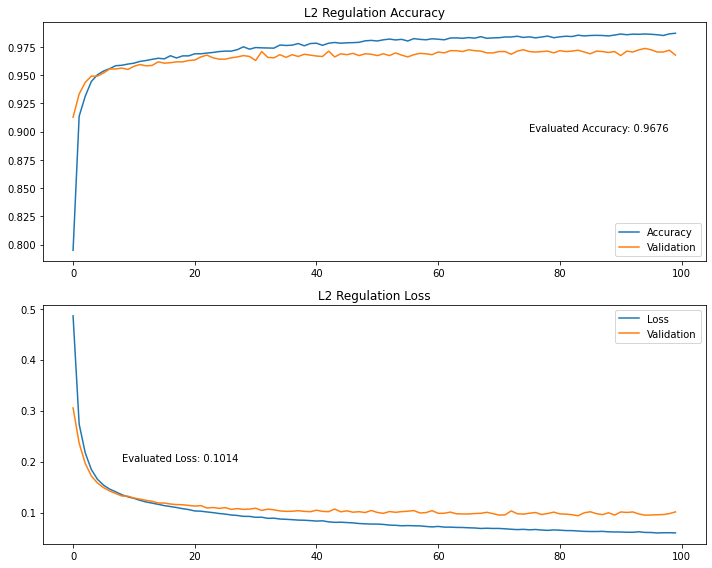

In [42]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(l2_reg_model.history['accuracy'], label="Accuracy")
axs[0].plot(l2_reg_model.history['val_accuracy'], label="Validation")
axs[0].legend(loc='lower right')
axs[0].text(75,.9,f'Evaluated Accuracy: {round(l2_accuracy,4)}')
axs[0].set_title("L2 Regulation Accuracy")

axs[1].plot(l2_reg_model.history['loss'], label="Loss")
axs[1].plot(l2_reg_model.history['val_loss'], label="Validation")
axs[1].legend(loc='upper right')
axs[1].text(8,.2,f'Evaluated Loss: {round(l2_loss,4)}')
axs[1].set_title("L2 Regulation Loss")

fig.tight_layout()

In [19]:
l2_loss, l2_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.1014 - accuracy: 0.9676 - 116ms/epoch - 1ms/step


In [20]:
## Looks good at first, but the model still finds out a pattern early and does not adapt to new information

## Adjusting model using Dropout

In [21]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='dropout')

## First Hidden Layer + Input

nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu'))
nn.add(tf.keras.layers.Dropout(.2))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))


nn.summary()

Model: "dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                975       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
dropout_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.8124 - val_loss: 0.3024 - val_accuracy: 0.8918
Epoch 2/100
238/238 [==============================] - 1s 2ms/step - loss: 0.2834 - accuracy: 0.8959 - val_loss: 0.2290 - val_accuracy: 0.9226
Epoch 3/100
238/238 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9172 - val_loss: 0.1840 - val_accuracy: 0.9400
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9311 - val_loss: 0.1557 - val_accuracy: 0.9463
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9393 - val_loss: 0.1375 - val_accuracy: 0.9514
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9452 - val_loss: 0.1252 - val_accuracy: 0.9546
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9487 - val_loss: 0.1187 - val_accuracy: 0.9554

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9725 - val_loss: 0.0820 - val_accuracy: 0.9676
Epoch 59/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9708 - val_loss: 0.0828 - val_accuracy: 0.9684
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9716 - val_loss: 0.0816 - val_accuracy: 0.9684
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9712 - val_loss: 0.0812 - val_accuracy: 0.9696
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9706 - val_loss: 0.0811 - val_accuracy: 0.9680
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9733 - val_loss: 0.0811 - val_accuracy: 0.9672
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9733 - val_loss: 0.0803 - val_accuracy:

In [23]:
dropout_loss, dropout_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0704 - accuracy: 0.9751 - 100ms/epoch - 1ms/step


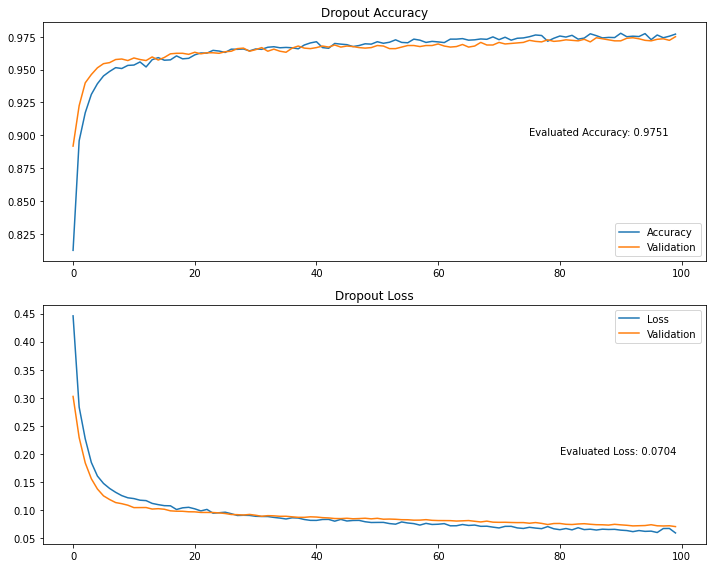

In [41]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(dropout_model.history['accuracy'], label='Accuracy')
axs[0].plot(dropout_model.history['val_accuracy'], label='Validation')
axs[0].legend(loc='lower right')
axs[0].text(75,.9,f'Evaluated Accuracy: {round(dropout_accuracy,4)}')
axs[0].set_title("Dropout Accuracy")

axs[1].plot(dropout_model.history['loss'], label='Loss')
axs[1].plot(dropout_model.history['val_loss'], label='Validation')
axs[1].legend(loc='upper right')
axs[1].text(80,.2,f'Evaluated Loss: {round(dropout_loss,4)}')
axs[1].set_title("Dropout Loss")

fig.tight_layout()

## Using both L2 and Dropout

In [25]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='dropout_and_l2')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu',
                             kernel_regularizer=regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(.2))


##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))


nn.summary()

Model: "dropout_and_l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                975       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [26]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 
                                                                  tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
dropout_l2_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 2s 4ms/step - loss: 0.4942 - accuracy: 0.7943 - precision: 0.3398 - recall: 0.2689 - val_loss: 0.3427 - val_accuracy: 0.8847 - val_precision: 0.8803 - val_recall: 0.2703
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8945 - precision: 0.8165 - recall: 0.4607 - val_loss: 0.2571 - val_accuracy: 0.9269 - val_precision: 0.8889 - val_recall: 0.5879
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9221 - precision: 0.8516 - recall: 0.6356 - val_loss: 0.2090 - val_accuracy: 0.9427 - val_precision: 0.8960 - val_recall: 0.7008
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9372 - precision: 0.8833 - recall: 0.7111 - val_loss: 0.1792 - val_accuracy: 0.9502 - val_precision: 0.9022 - val_recall: 0.7507
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9422

238/238 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9647 - precision: 0.9144 - recall: 0.8660 - val_loss: 0.1004 - val_accuracy: 0.9672 - val_precision: 0.9071 - val_recall: 0.8714
Epoch 38/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9673 - precision: 0.9215 - recall: 0.8756 - val_loss: 0.0989 - val_accuracy: 0.9712 - val_precision: 0.9350 - val_recall: 0.8688
Epoch 39/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9683 - precision: 0.9269 - recall: 0.8756 - val_loss: 0.0974 - val_accuracy: 0.9696 - val_precision: 0.9130 - val_recall: 0.8819
Epoch 40/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9658 - precision: 0.9171 - recall: 0.8700 - val_loss: 0.0964 - val_accuracy: 0.9696 - val_precision: 0.9108 - val_recall: 0.8845
Epoch 41/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9692 - preci

238/238 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9737 - precision: 0.9366 - recall: 0.9005 - val_loss: 0.0856 - val_accuracy: 0.9720 - val_precision: 0.9235 - val_recall: 0.8871
Epoch 74/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9741 - precision: 0.9396 - recall: 0.8997 - val_loss: 0.0855 - val_accuracy: 0.9739 - val_precision: 0.9268 - val_recall: 0.8976
Epoch 75/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9735 - precision: 0.9315 - recall: 0.9053 - val_loss: 0.0849 - val_accuracy: 0.9735 - val_precision: 0.9220 - val_recall: 0.9003
Epoch 76/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9754 - precision: 0.9401 - recall: 0.9077 - val_loss: 0.0859 - val_accuracy: 0.9727 - val_precision: 0.9194 - val_recall: 0.8976
Epoch 77/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9741 - preci

In [27]:
dropl2_loss, dropl2_accuracy, dropl2_prec, dropl2_recall = nn.evaluate(X_test_scaled, y_test, verbose = 2)

80/80 - 0s - loss: 0.0809 - accuracy: 0.9747 - precision: 0.9249 - recall: 0.9055 - 112ms/epoch - 1ms/step


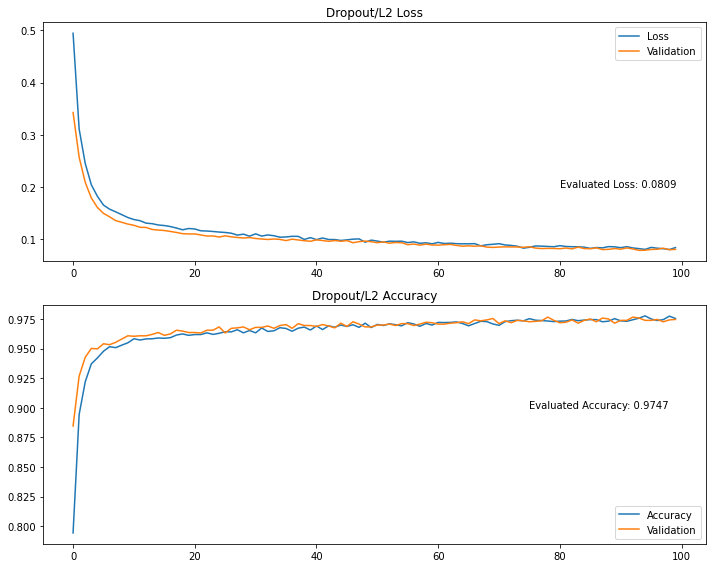

In [40]:
fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].plot(dropout_l2_model.history['loss'], label='Loss')
axs[0].plot(dropout_l2_model.history['val_loss'], label='Validation')
axs[0].legend()
axs[0].text(80,.2,f'Evaluated Loss: {round(dropl2_loss,4)}')
axs[0].set_title("Dropout/L2 Loss")

axs[1].plot(dropout_l2_model.history['accuracy'], label='Accuracy')
axs[1].plot(dropout_l2_model.history['val_accuracy'], label='Validation')
axs[1].legend()
axs[1].text(75,.9,f'Evaluated Accuracy: {round(dropl2_accuracy,4)}')
axs[1].set_title("Dropout/L2 Accuracy")

# axs[0,1].plot(dropout_l2_model.history['recall'], label='Recall')
# axs[0,1].plot(dropout_l2_model.history['val_recall'], label='Validation')
# axs[0,1].legend()
# axs[0,1].text(75,.9,f'Evaluated Accuracy: {round(dropl2_recall,4)}')
# axs[0,1].set_title("Dropout/L2 Recall")

# axs[1,1].plot(dropout_l2_model.history['precision'], label='Precision')
# axs[1,1].plot(dropout_l2_model.history['val_precision'], label='Validation')
# axs[1,1].legend()
# axs[1,1].text(75,.9,f'Evaluated Accuracy: {round(dropl2_recall,4)}')
# axs[1,1].set_title("Dropout/L2 Precision")

fig.tight_layout()

In [29]:
dropout_l2_df= pd.DataFrame({
    'Loss': dropout_l2_model.history['loss'],
    'Validation Loss': dropout_l2_model.history['val_loss'],
    'Accuracy': dropout_l2_model.history['accuracy'],
    'Validation Accuracy': dropout_l2_model.history['val_accuracy'],
    
})

dropout_l2_df.to_csv('Resources/neural_network/dropout_l2_history.csv',index=False)
dropout_l2_df.to_hdf('Resources/neural_network/dropout_l2_model.h5',key='dl2_model')